import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]    #first principal compoment and c2 is second
c2 = Vt.T[:, 1]

W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)



In [49]:
#Using ScikitLearns method
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
pca.explained_variance_ratio_

#to use explained variance ratio
new_pca = PCA()
new_pca.fit(X)
cumsum = np.cumsum(new_pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= .95) + 1 #this the number of dimensions we should reduce to keep maximum variance

array([0.84248607, 0.14631839])

In [61]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)


In [63]:
#using mnist dataset

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist.data
y = mnist.target


pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)
print(X_reduced.shape)
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(70000, 154)


(70000, 784)

In [65]:
from sklearn.decomposition import IncrementalPCA

X_train, y_train = mnist.data[:40000,:], mnist.target[:40000]
X_val, y_val = mnist.data[40000:50000, :],  mnist.target[40000:50000]
X_test, y_test = mnist.data[50000:, :], mnist.target[50000:]



n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [51]:
#KERNEL PCA
#to compute preimage error, we first calculate best params by gridsearch, then transform dataset and 
#using fit_inverse_transform=True, we can reverse the transformation and caluclate the mean error
from sklearn.decomposition import KernelPCA
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

#sigmoid kernel is giving error of presence of nan/inf in dataset
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf"]#, "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=2)



try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
#X_train = [np.arange(5), np.arange(5,10), np.arange(10,15), np.arange(15,20), np.arange(20,25),np.arange(5), np.arange(5,10), np.arange(10,15), np.arange(15,20), np.arange(20,25)]
#y_train = [1,0,1,1,1,0,0,0,1,0]

X_train, y_train = mnist.data[:10000,:], mnist.target[:10000]
grid_search.fit(X_train, y_train)


kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform = True)
X_reduced = kpca.fit_transform(X_train)
preimage = kpca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(X_train, preimage))


grid_search.best_params_

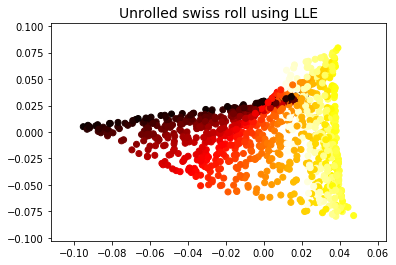

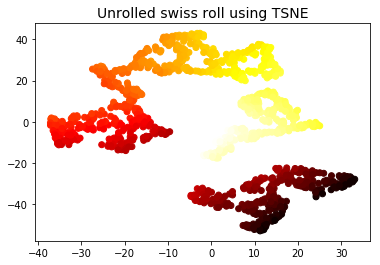

In [73]:
#TSNE & LLE

from sklearn.manifold import TSNE
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)


from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 20, random_state = 42)
X_reduced = lle.fit_transform(X)

tsne = TSNE(n_components = 2, random_state = 42)
X_reduced_TSNE = tsne.fit_transform(X)

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
# plt.xlabel("$z_1$", fontsize=18)
# plt.ylabel("$z_2$", fontsize=18)
# plt.axis([-0.065, 0.055, -0.1, 0.12])
# plt.grid(True)

plt.show()

plt.title("Unrolled swiss roll using TSNE", fontsize=14)
plt.scatter(X_reduced_TSNE[:, 0], X_reduced_TSNE[:, 1], c=t, cmap=plt.cm.hot)
# plt.xlabel("$z_1$", fontsize=18)
# plt.ylabel("$z_2$", fontsize=18)
# plt.axis([-0.065, 0.055, -0.1, 0.12])
# plt.grid(True)

plt.show()

In [6]:
#Question 9

from sklearn.ensemble import RandomForestClassifier
import time


try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X_train_f, y_train_f = mnist.data[:60000,:], mnist.target[:60000]
X_val_f, y_val_f = mnist.data[40000:50000, :],  mnist.target[40000:50000]
X_test_f, y_test_f = mnist.data[60000:, :], mnist.target[60000:]



Time for Randomforest on all features: 4.0 seconds
Testing score:  0.9492


In [12]:
#Trying with Randomforest classifier

rnd_clf = RandomForestClassifier(n_estimators = 10,  random_state = 42)
t1 = time.time()
rnd_clf.fit(X_train_f, y_train_f)
t2 = time.time()
print("Time for Randomforest on all features: {:.1f} seconds".format(t2 - t1))

print('Testing score: ', rnd_clf.score(X_test_f, y_test_f))


from sklearn.decomposition import PCA
rnd_clf2 = RandomForestClassifier(n_estimators = 10, random_state = 42)

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train_f)

print('Number of components returned: ', pca.n_components_)
#pca_test = PCA(n_components = pca.n_components_)
#X_test_reduced = pca_test.fit_transform(X_test_f)
X_test_reduced = pca.transform(X_test_f)

t3 = time.time()
rnd_clf2.fit(X_reduced, y_train_f)
t4 = time.time()
print("Time for Randomforest on reduced features: {:.1f} seconds".format(t4 - t3))
print('testing score: ', rnd_clf2.score(X_test_reduced, y_test_f))

#Results: PCA is actually reducing accuracy and increasing time. so lets try another algo

Time for Randomforest on all features: 4.0 seconds
Testing score:  0.9492
Number of components returned:  154
Time for Randomforest on reduced features: 14.2 seconds
testing score:  0.9009


In [11]:
#Trying with MLP
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state = 42)
mlp_clf2 = MLPClassifier(random_state = 42)

t1 = time.time()
mlp_clf.fit(X_train_f, y_train_f)
t2 = time.time()
print("Time for MLP on all features: {:.1f} seconds".format(t2 - t1))

print('Testing score: ', mlp_clf.score(X_test_f, y_test_f))


from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train_f)

print('Number of components returned: ', pca.n_components_)
X_test_reduced = pca.transform(X_test_f)

t3 = time.time()
mlp_clf2.fit(X_reduced, y_train_f)
t4 = time.time()
print("Time for Randomforest on reduced features: {:.1f} seconds".format(t4 - t3))
print('testing score: ', mlp_clf2.score(X_test_reduced, y_test_f))

#Results: PCA is actually reducing accuracy and increasing time. so lets try another algo

Time for MLP on all features: 216.6 seconds
Testing score:  0.9655
Number of components returned:  154
Time for Randomforest on reduced features: 64.1 seconds
testing score:  0.9716


TypeError: text() missing 2 required positional arguments: 'y' and 's'

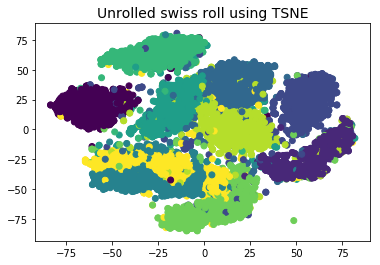

In [89]:
#QUESTION 10
#TSNE 

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx].astype(int)

tsne = TSNE(n_components = 2, random_state = 42)
X_reduced_TSNE = tsne.fit_transform(X)

plt.title("Unrolled swiss roll using TSNE", fontsize=14)
plt.scatter(X_reduced_TSNE[:, 0], X_reduced_TSNE[:, 1],  c = y)

plt.show()

axis is  AxesSubplot(0.125,0.125;0.775x0.755)


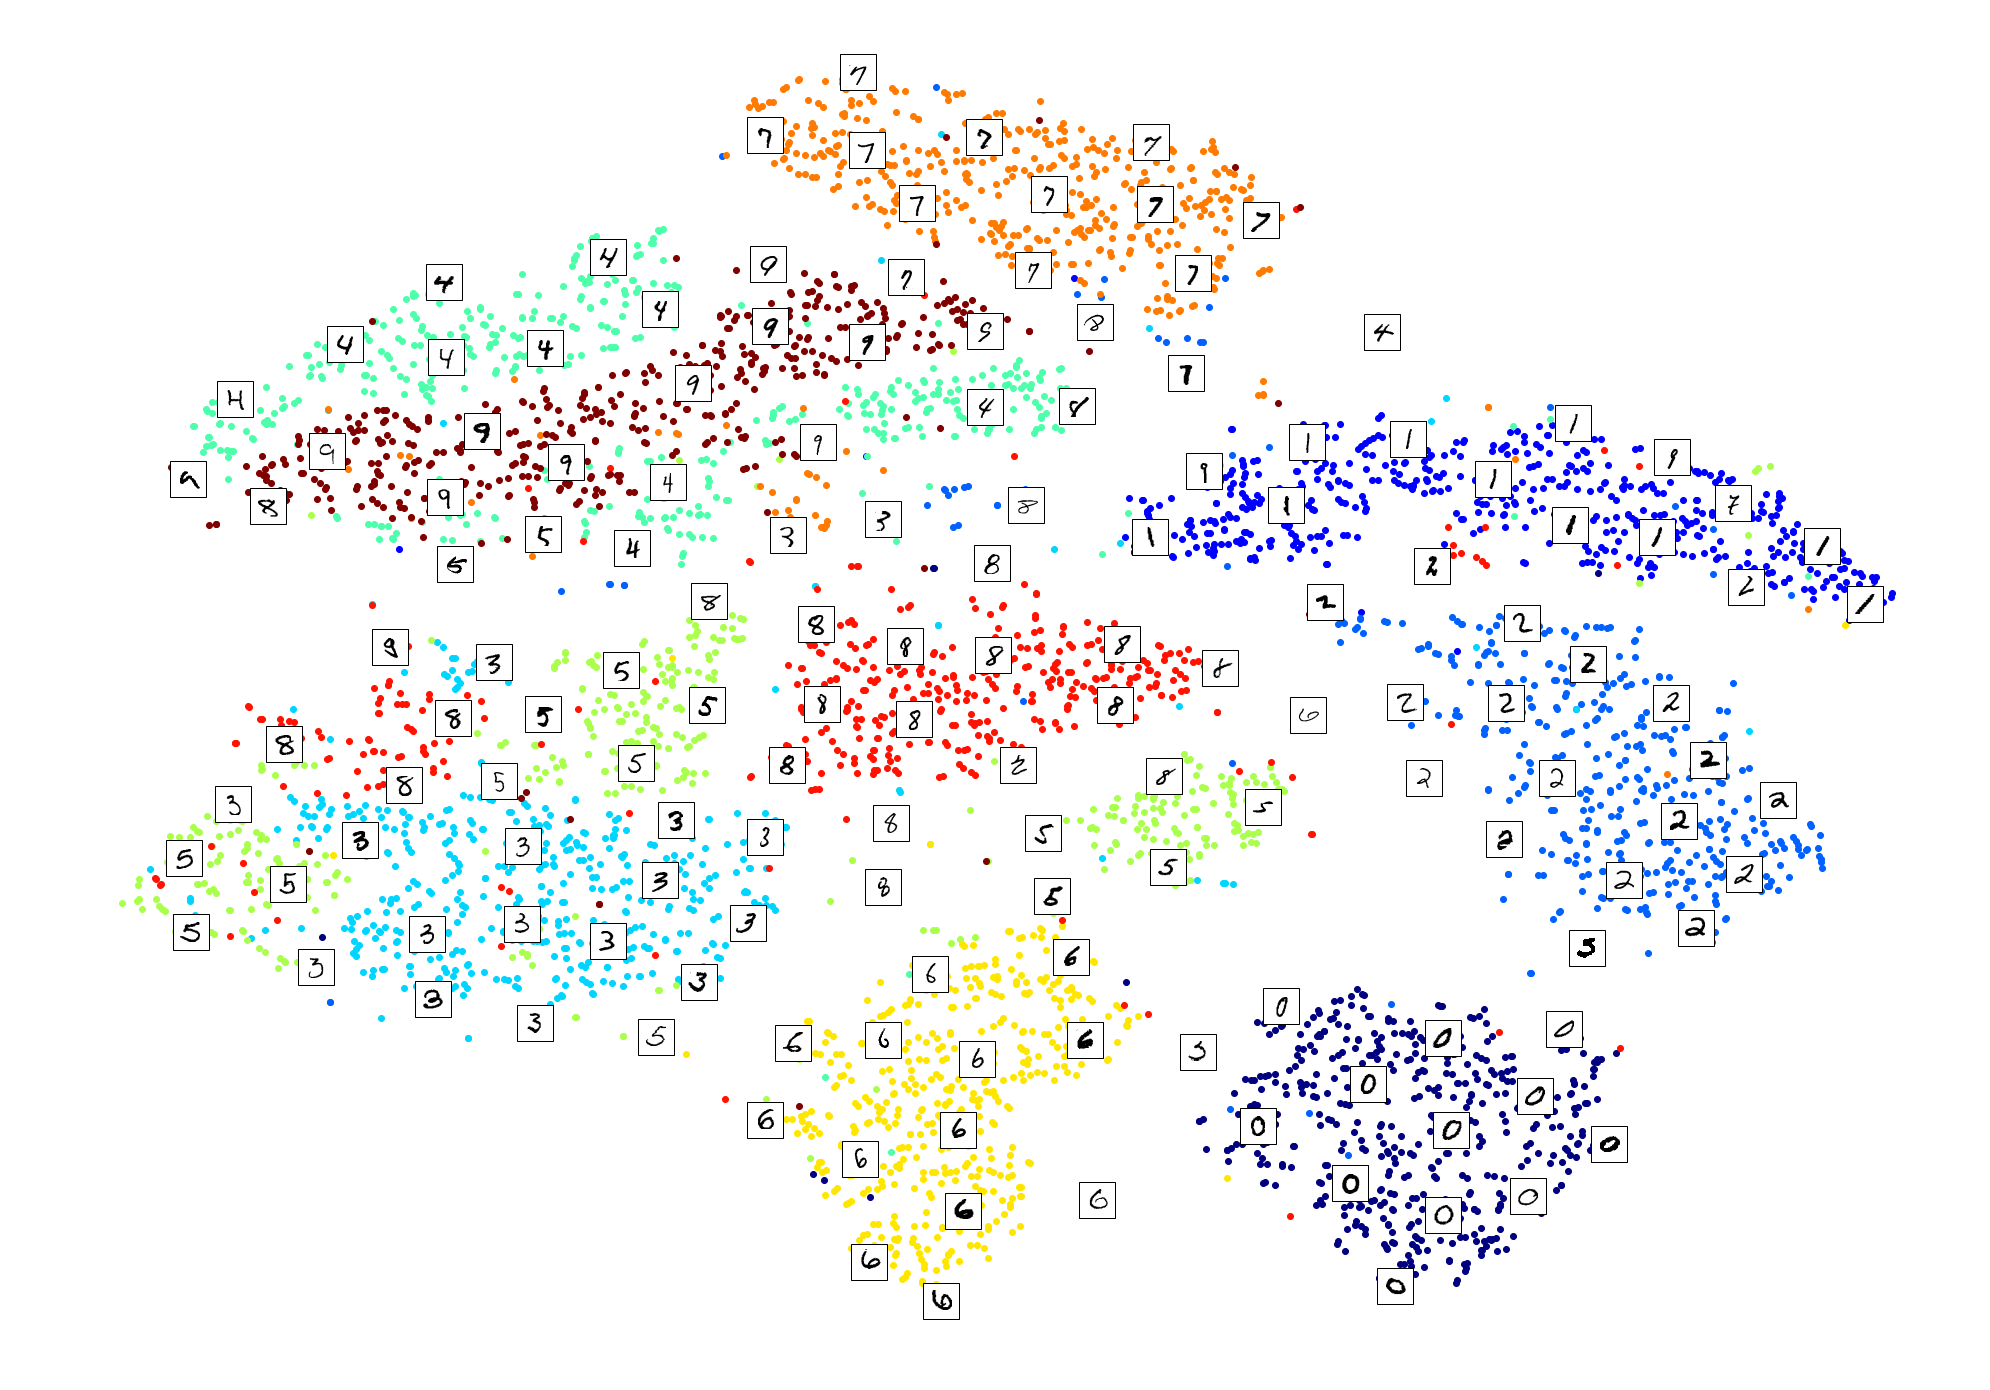

In [79]:
#custom function to plot the pictures of numbers on the graph

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    
    print('axis is ', ax)
    for index, image_coord in enumerate(X_normalized):
        #image_coord is 2 columns for all samples 
        a = np.linalg.norm(np.array(neighbors) - image_coord, axis=1)
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()

        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                #annotationbbox takes an instance (offset(which in turn takes the image) and location)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)



#----------------------plotting----------         
#all dataset
plot_digits(X_reduced_TSNE, y, images=X, figsize=(35, 25))


#to just plot 2 3 and 5 from the tsne performed on whole dataset
idx = (y == 2) | (y == 3) | (y == 5) 
y_235 = y[idx]
X_images235 = X[idx,:]

X_235 = X_reduced_TSNE[idx]

plot_digits(X_235, y_235,images = X_images235, figsize=(20, 20))

#if we perform tsne on only the data of 2 3 and 5 
idx = (y == 2) | (y == 3) | (y == 5) 
X_235 = X[idx]
tsne = TSNE(n_components = 2, random_state = 42)
X_TSNE235 = tsne.fit_transform(X_235)


plot_digits(X_TSNE235, y_235,images = X_images235, figsize=(20, 20))



axis is  AxesSubplot(0.125,0.125;0.775x0.755)


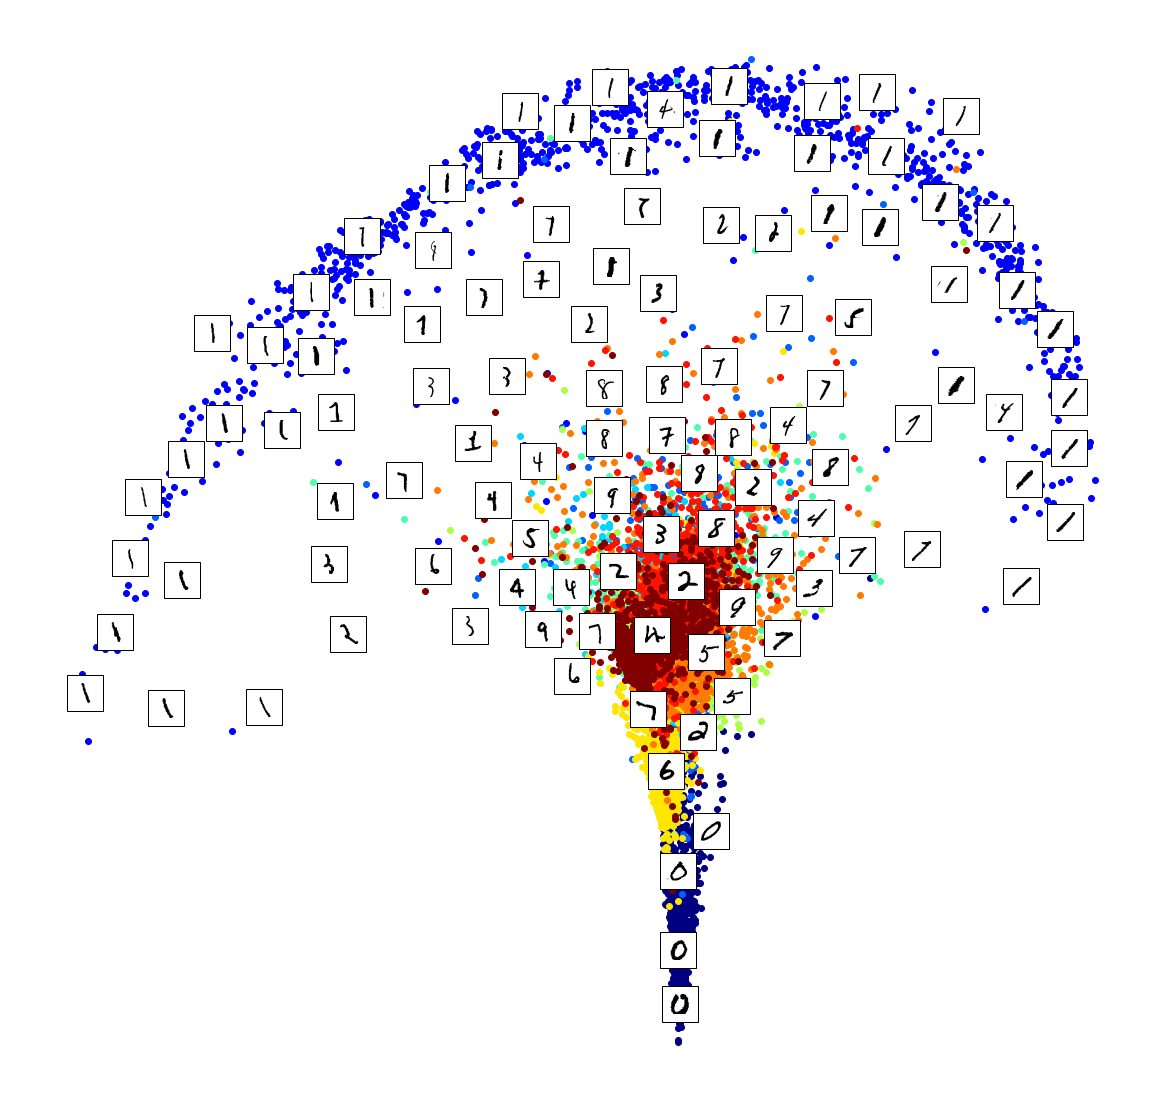

In [94]:
#pca lda and mds
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_kpca = kpca.fit_transform(X)


plot_digits(X_kpca, y, images = X, figsize=(20, 20))


from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 20, random_state = 42)
X_lle = lle.fit_transform(X)

plot_digits(X_lle, y, images = X, figsize=(20, 20))

axis is  AxesSubplot(0.125,0.125;0.775x0.755)


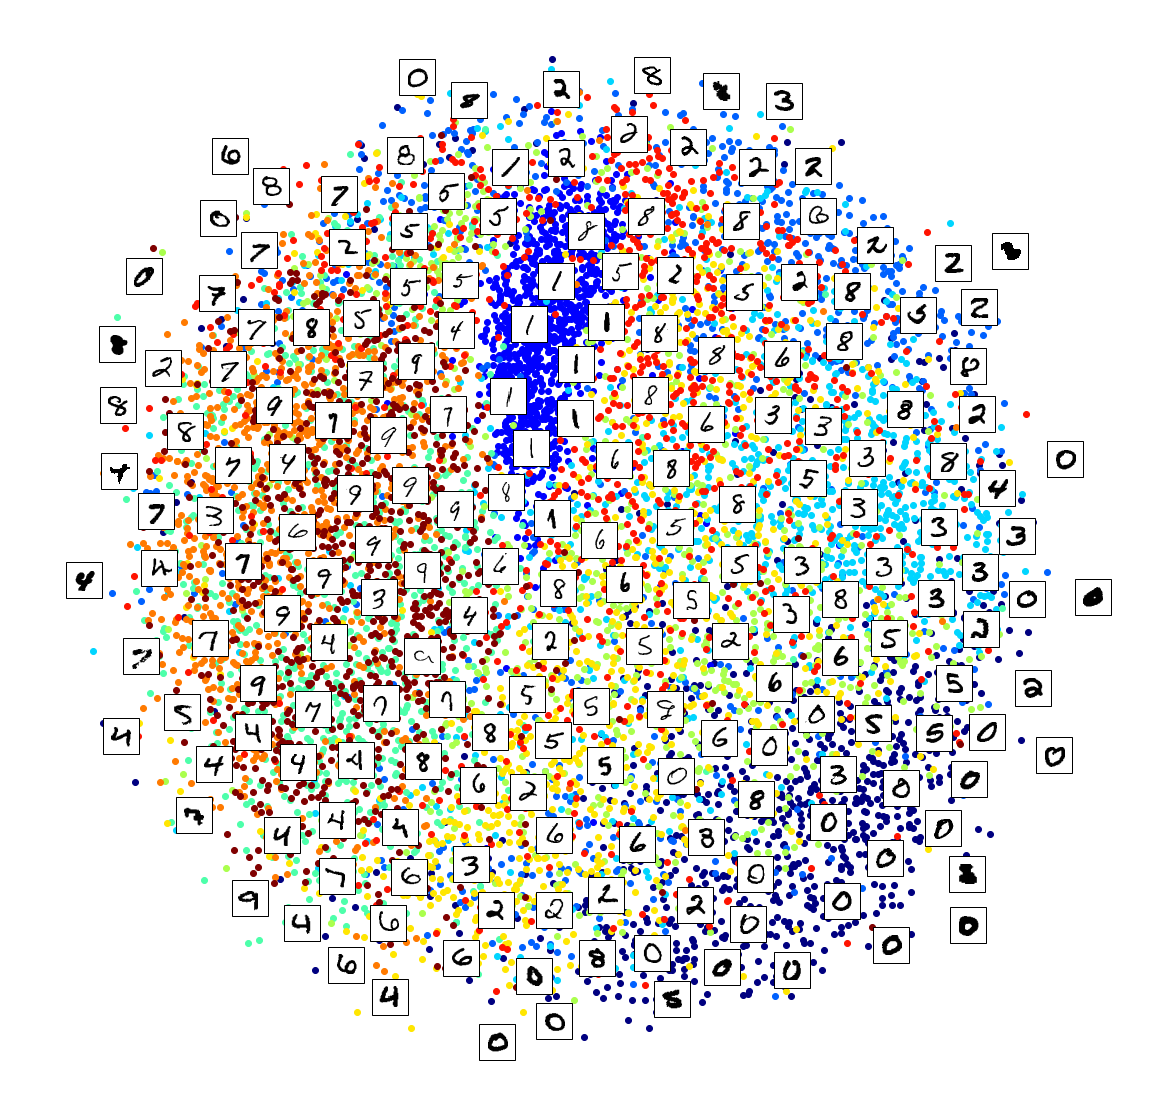

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X, y)
X_lda = lda.transform(X)

plot_digits(X_lda, y, images = X, figsize=(20, 20))

from sklearn.manifold import MDS
mds = MDS(n_components = 2)
X_mds = mds.fit_transform(X)

plot_digits(X_mds, y, images = X, figsize=(20, 20))

In [110]:
#Gaussian mixture

#check the mapping hting when yo star t 
from sklearn.datasets import load_iris

dataf = load_iris()
X = dataf.data
y = dataf.target
dataf.target_names

from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])


np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

In [140]:
#trying gaussian mixture on the mnist(between 1 and 0)
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

m = 5000
idx = np.random.permutation(60000)[:m]

#selecting first 5000
y = mnist['target'][idx].astype(int)
X = mnist['data'][idx]

#choosing only 1s and 0s from the random 5000
idx_10 = (y == 1) | (y == 0)
X10 = X[idx_10]
y10 = y[idx_10]

from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components = 2, random_state = 42).fit(X10).predict(X10)
np.sum(y_pred==y10) / len(y_pred)

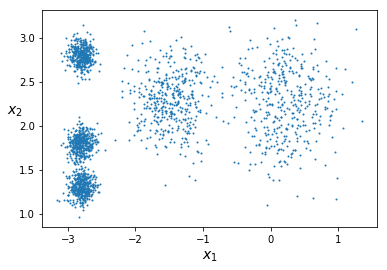

<Figure size 576x288 with 0 Axes>

In [153]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
    plt.figure(figsize=(8, 4))
    
plot_clusters(X)

plt.show()

In [158]:
#kmeans as hard and soft classifier
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

#hard classificiation
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

#distance measure from each centroid
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [156]:
# uploading digits dataset and setting baseline\
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)


#kmeans as the preprocessing step
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)


from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)



In [160]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [27]:
#Picture segmentation
import os
from matplotlib.image import imread
image = imread(os.path.join("images","lb.jpg"))
image.shape

from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
print('clusters ', kmeans.cluster_centers_)

print('kmeans.labes ', kmeans.labels_)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# segmented_imgs.append(segmented_img.reshape(image.shape))

(499, 333, 3)